In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import pandas as pd
import numpy as np

In [2]:
import csv
df=pd.read_csv("Womens Clothing E-Commerce Reviews.csv",error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
df = df.drop(['Title', 'Clothing ID', 'Positive Feedback Count'], axis=1)

In [5]:
null_val= df.isnull().sum()

In [6]:
df = df.dropna(subset=['Review Text', 'Division Name', 'Department Name', 'Class Name'], axis=0)
df = df.reset_index(drop=True)

In [7]:
df.head()

,Unnamed: 0,Age,Review Text,Rating,Recommended IND,Division Name,Department Name,Class Name
0,0,33,Absolutely wonderful - silky and sexy and comf...,4,1,Initmates,Intimate,Intimates
1,1,34,Love this dress! it's sooo pretty. i happene...,5,1,General,Dresses,Dresses
2,2,60,I had such high hopes for this dress and reall...,3,0,General,Dresses,Dresses
3,3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,General Petite,Bottoms,Pants
4,4,47,This shirt is very flattering to all due to th...,5,1,General,Tops,Blouses


In [8]:
import plotly.express as px
import matplotlib.pyplot as plt
fig = px.histogram(df['Department Name'], color=df['Recommended IND'],
                   labels={'value': 'Department Name',
                           'color': 'Recommended?'})
fig.update_layout(bargap=0.2)
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Department Name and Recommendation Distribution',
                  title_x=0.5, title_font=dict(size=20))
fig.update_layout(barmode='group')
fig.show()

In [9]:
fig = px.histogram(df['Age'], marginal='box',
                   labels={'value': 'Age'})

fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Distribution of the Age of the Customers',
                  title_x=0.5, title_font=dict(size=20))
fig.show()

In [10]:
fig = px.histogram(df['Rating'], color=df['Recommended IND'],
                   labels={'value': 'Rating',
                           'color': 'Recommended?'})
fig.update_layout(bargap=0.2)
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Relationship between Ratings and Recommendation',
                  title_x=0.5, title_font=dict(size=20))
fig.update_layout(barmode='group')
fig.show()

In [11]:
df.head()

,Unnamed: 0,Age,Review Text,Rating,Recommended IND,Division Name,Department Name,Class Name
0,0,33,Absolutely wonderful - silky and sexy and comf...,4,1,Initmates,Intimate,Intimates
1,1,34,Love this dress! it's sooo pretty. i happene...,5,1,General,Dresses,Dresses
2,2,60,I had such high hopes for this dress and reall...,3,0,General,Dresses,Dresses
3,3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,General Petite,Bottoms,Pants
4,4,47,This shirt is very flattering to all due to th...,5,1,General,Tops,Blouses


In [12]:
df.drop(columns=['Unnamed: 0'])
df['Review Text']=df['Review Text'].str.lower()

In [13]:
import re

def remove_punctuations_numbers(inputs):
    return re.sub(r'[^a-zA-Z]', ' ', inputs)


df['Review Text'] = df['Review Text'].apply(remove_punctuations_numbers)

In [14]:
df.head()

,Unnamed: 0,Age,Review Text,Rating,Recommended IND,Division Name,Department Name,Class Name
0,0,33,absolutely wonderful silky and sexy and comf...,4,1,Initmates,Intimate,Intimates
1,1,34,love this dress it s sooo pretty i happene...,5,1,General,Dresses,Dresses
2,2,60,i had such high hopes for this dress and reall...,3,0,General,Dresses,Dresses
3,3,50,i love love love this jumpsuit it s fun fl...,5,1,General Petite,Bottoms,Pants
4,4,47,this shirt is very flattering to all due to th...,5,1,General,Tops,Blouses


In [15]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

def tokenization(inputs):  
    return word_tokenize(inputs)


df['text_tokenized'] = df['Review Text'].apply(tokenization)
df['text_tokenized'].head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0    [absolutely, wonderful, silky, and, sexy, and,...
1    [love, this, dress, it, s, sooo, pretty, i, ha...
2    [i, had, such, high, hopes, for, this, dress, ...
3    [i, love, love, love, this, jumpsuit, it, s, f...
4    [this, shirt, is, very, flattering, to, all, d...
Name: text_tokenized, dtype: object

In [16]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop_words.remove('not')


def stopwords_remove(inputs):  # Ref.2
    return [k for k in inputs if k not in stop_words]


df['text_stop'] = df['text_tokenized'].apply(stopwords_remove)
df['text_stop'].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0    [absolutely, wonderful, silky, sexy, comfortable]
1    [love, dress, sooo, pretty, happened, find, st...
2    [high, hopes, dress, really, wanted, work, ini...
3    [love, love, love, jumpsuit, fun, flirty, fabu...
4    [shirt, flattering, due, adjustable, front, ti...
Name: text_stop, dtype: object

In [17]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()


def lemmatization(inputs): 
    return [lemmatizer.lemmatize(word=kk, pos='v') for kk in inputs]


df['text_lemmatized'] = df['text_stop'].apply(lemmatization)
df['text_lemmatized'].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


0    [absolutely, wonderful, silky, sexy, comfortable]
1    [love, dress, sooo, pretty, happen, find, stor...
2    [high, hop, dress, really, want, work, initial...
3    [love, love, love, jumpsuit, fun, flirty, fabu...
4    [shirt, flatter, due, adjustable, front, tie, ...
Name: text_lemmatized, dtype: object

In [21]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [22]:
df['Review Text']=df['text_lemmatized'].str.join(' ')

In [23]:
df.head()

,Age,Review Text,Rating,Recommended IND,Division Name,Department Name,Class Name,text_tokenized,text_stop,text_lemmatized
0,33,absolutely wonderful silky sexy comfortable,4,1,Initmates,Intimate,Intimates,"[absolutely, wonderful, silky, and, sexy, and,...","[absolutely, wonderful, silky, sexy, comfortable]","[absolutely, wonderful, silky, sexy, comfortable]"
1,34,love dress sooo pretty happen find store glad ...,5,1,General,Dresses,Dresses,"[love, this, dress, it, s, sooo, pretty, i, ha...","[love, dress, sooo, pretty, happened, find, st...","[love, dress, sooo, pretty, happen, find, stor..."
2,60,high hop dress really want work initially orde...,3,0,General,Dresses,Dresses,"[i, had, such, high, hopes, for, this, dress, ...","[high, hopes, dress, really, wanted, work, ini...","[high, hop, dress, really, want, work, initial..."
3,50,love love love jumpsuit fun flirty fabulous ev...,5,1,General Petite,Bottoms,Pants,"[i, love, love, love, this, jumpsuit, it, s, f...","[love, love, love, jumpsuit, fun, flirty, fabu...","[love, love, love, jumpsuit, fun, flirty, fabu..."
4,47,shirt flatter due adjustable front tie perfect...,5,1,General,Tops,Blouses,"[this, shirt, is, very, flattering, to, all, d...","[shirt, flattering, due, adjustable, front, ti...","[shirt, flatter, due, adjustable, front, tie, ..."


In [24]:
def remove_less_than_2(inputs):  
    return [j for j in inputs if len(j) > 2]


df['final'] = df['text_lemmatized'].apply(remove_less_than_2)

In [25]:
df['final']= df['final'].str.join(' ')

In [26]:
df.head()

,Age,Review Text,Rating,Recommended IND,Division Name,Department Name,Class Name,text_tokenized,text_stop,text_lemmatized,final
0,33,absolutely wonderful silky sexy comfortable,4,1,Initmates,Intimate,Intimates,"[absolutely, wonderful, silky, and, sexy, and,...","[absolutely, wonderful, silky, sexy, comfortable]","[absolutely, wonderful, silky, sexy, comfortable]",absolutely wonderful silky sexy comfortable
1,34,love dress sooo pretty happen find store glad ...,5,1,General,Dresses,Dresses,"[love, this, dress, it, s, sooo, pretty, i, ha...","[love, dress, sooo, pretty, happened, find, st...","[love, dress, sooo, pretty, happen, find, stor...",love dress sooo pretty happen find store glad ...
2,60,high hop dress really want work initially orde...,3,0,General,Dresses,Dresses,"[i, had, such, high, hopes, for, this, dress, ...","[high, hopes, dress, really, wanted, work, ini...","[high, hop, dress, really, want, work, initial...",high hop dress really want work initially orde...
3,50,love love love jumpsuit fun flirty fabulous ev...,5,1,General Petite,Bottoms,Pants,"[i, love, love, love, this, jumpsuit, it, s, f...","[love, love, love, jumpsuit, fun, flirty, fabu...","[love, love, love, jumpsuit, fun, flirty, fabu...",love love love jumpsuit fun flirty fabulous ev...
4,47,shirt flatter due adjustable front tie perfect...,5,1,General,Tops,Blouses,"[this, shirt, is, very, flattering, to, all, d...","[shirt, flattering, due, adjustable, front, ti...","[shirt, flatter, due, adjustable, front, tie, ...",shirt flatter due adjustable front tie perfect...


In [27]:
y = df['Recommended IND']
X = df['final']

X.head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happen find store glad ...
2    high hop dress really want work initially orde...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flatter due adjustable front tie perfect...
Name: final, dtype: object

In [29]:
from sklearn.model_selection import  train_test_split
x, X_test, y, y_test = train_test_split(X, y, test_size=0.3, random_state=13)  

X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.25, random_state=13)

In [30]:
from tensorflow.keras.preprocessing.text import Tokenizer
num_words = 10000
tokenizer = Tokenizer(num_words=num_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

Tokenized_train = tokenizer.texts_to_sequences(X_train)
Tokenized_val = tokenizer.texts_to_sequences(X_val)

In [34]:
print('Non-tokenized Version: ', X_train[0])
print('Tokenized Version: ', tokenizer.texts_to_sequences([X_train[0]]))
print('--'*20)


Non-tokenized Version:  absolutely wonderful silky sexy comfortable
Tokenized Version:  [[159, 372, 727, 489, 34]]
----------------------------------------


In [35]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
maxlen = 50
Padded_train = pad_sequences(Tokenized_train, maxlen=maxlen, padding='pre')
Padded_val = pad_sequences(Tokenized_val, maxlen=maxlen, padding='pre')

In [37]:
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Bidirectional
from keras.layers import Embedding
from keras.layers import GlobalAvgPool1D
import tensorflow as tf

In [38]:
model = Sequential()

model.add(Embedding(num_words, 16, input_length=maxlen))
model.add(Dropout(0.2))

model.add(GlobalAvgPool1D())
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

opt = tf.optimizers.Adam(lr=0.55e-3)  

model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            160000    
                                                                 
 dropout (Dropout)           (None, 50, 16)            0         
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 160,017
Trainable params: 160,017
Non-trainable params: 0
__________________________________________________

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [39]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='auto', patience=5,
                                                  restore_best_weights=True)

epochs = 100
hist = model.fit(Padded_train, y_train, epochs=epochs,
                 validation_data=(Padded_val, y_val),
                 callbacks=[early_stopping], batch_size=32)

Epoch 1/100
372/372 [==============================] - 3s 5ms/step - loss: 0.5764 - accuracy: 0.8118 - val_loss: 0.4750 - val_accuracy: 0.8290
Epoch 2/100
372/372 [==============================] - 2s 5ms/step - loss: 0.4735 - accuracy: 0.8174 - val_loss: 0.4409 - val_accuracy: 0.8290
Epoch 3/100
372/372 [==============================] - 2s 4ms/step - loss: 0.4575 - accuracy: 0.8174 - val_loss: 0.4267 - val_accuracy: 0.8290
Epoch 4/100
372/372 [==============================] - 2s 5ms/step - loss: 0.4412 - accuracy: 0.8174 - val_loss: 0.4126 - val_accuracy: 0.8290
Epoch 5/100
372/372 [==============================] - 2s 5ms/step - loss: 0.4256 - accuracy: 0.8174 - val_loss: 0.3986 - val_accuracy: 0.8290
Epoch 6/100
372/372 [==============================] - 2s 5ms/step - loss: 0.4083 - accuracy: 0.8174 - val_loss: 0.3822 - val_accuracy: 0.8295
Epoch 7/100
372/372 [==============================] - 2s 5ms/step - loss: 0.3896 - accuracy: 0.8181 - val_loss: 0.3654 - val_accuracy: 0.8318

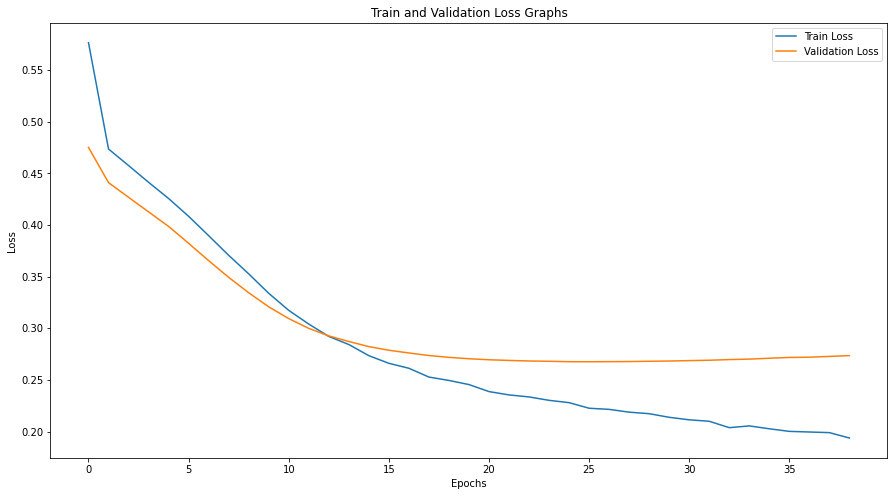

In [40]:
plt.figure(figsize=(15, 8))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Train and Validation Loss Graphs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [41]:
X_test = X_test.apply(tokenization)
X_test = X_test.apply(stopwords_remove)
X_test = X_test.apply(lemmatization)
X_test = X_test.str.join(' ')

X_test.head()

10818                              low waisted weird liner
779      shirt not good look gal hips fit top tight ord...
10907    love dress long enough dramatic graze feet wit...
17442    understand pencil skirt gon body hug however r...
832      order shirt wear pair pant return one reason t...
Name: final, dtype: object

In [42]:
Tokenized_test = tokenizer.texts_to_sequences(X_test)
Padded_test = pad_sequences(Tokenized_test, maxlen=maxlen, padding='pre')

test_evaluate = model.evaluate(Padded_test, y_test)

213/213 [==============================] - 0s 1ms/step - loss: 0.2695 - accuracy: 0.8857


In [43]:
from sklearn.metrics import confusion_matrix
pred_train_lstm = model.predict(Padded_train)
pred_test_lstm = model.predict(Padded_test)

In [44]:
for i, x in enumerate(pred_test_lstm):
    if 0 <= x < 0.49:
        pred_test_lstm[i] = 0
    else:
        pred_test_lstm[i] = 1

for i, x in enumerate(pred_train_lstm):
    if 0 <= x < 0.49:
        pred_train_lstm[i] = 0
    else:
        pred_train_lstm[i] = 1

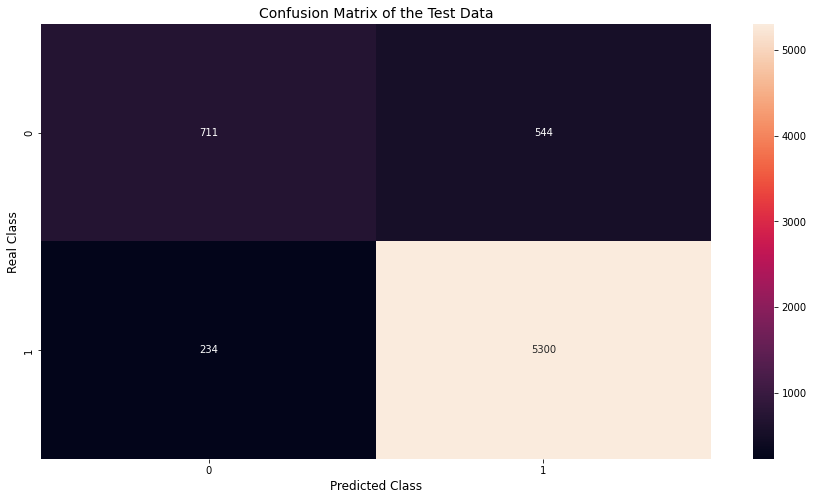

In [46]:
import seaborn as sns
conf_mat = confusion_matrix(y_true=y_test, y_pred=pred_test_lstm)
plt.figure(figsize=(15, 8))
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.title('Confusion Matrix of the Test Data', fontsize=14)
plt.ylabel('Real Class', fontsize=12)
plt.xlabel('Predicted Class', fontsize=12)
plt.show()

In [47]:
def predict_recommendation(input_text):  
    input_text = input_text.lower()
    input_text = re.sub(r'[^a-zA-Z]', ' ', input_text)
    input_text = tokenization(input_text)
    input_text = stopwords_remove(input_text)
    input_text = lemmatization(input_text)
    input_text = ' '.join(input_text)
    input_text = tokenizer.texts_to_sequences([input_text])
    input_text = pad_sequences(input_text, maxlen=maxlen, padding='pre')
    input_text = model.predict(input_text)
    if input_text >= 0.5:
        input_text = f'Recommended with %{round(float(input_text*100), 2)}'
    else:
        input_text = f'Not Recommended with %{round(float(input_text*100), 2)}'

    return print(input_text)

In [59]:
predict_recommendation("Very good product ")


Recommended with %69.31
